### Table of Contents 

### 1. Importing libraries and data
### 2. Data Cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### 5. Assessing Model Performance

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Create a project folder string

path = r'/Users/nora/Desktop/CareerFoundry Achievement 6'

In [10]:
# Import the data set

df_clean = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'airbnb_clean.csv'))

## 2. Data Cleaning

In [11]:
df_clean.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,no_reviews
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,False
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,False
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,True
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,False
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,False


In [12]:
# Drop unnecessary column

df_clean = df_clean.drop('Unnamed: 0', 1)

In [13]:
df_clean.shape

(48894, 17)

##### Missing values

In [14]:
# Check for missing values

df_clean.isnull().sum()



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
no_reviews                            0
dtype: int64

In [16]:
# There are some missing values in the name and host_name columns. However, these are irrelevant for the 
# regression analysis so I wil not address them. The missing values in the last_review and reviews per month column
# indicate that the listing has no reviews so far which is why I created the 'no_reviews' column in the 1st exercise.                           
   

##### Duplicates check

In [20]:
# Check for duplicates 

df_dups = df_clean[df_clean.duplicated()]

In [21]:
df_dups.shape # No duplicates

(0, 17)

##### Extreme values checks

/Users/nora/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

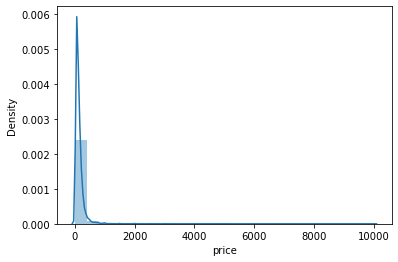

In [25]:
sns.distplot(df_clean['price'], bins=25) # Shows extreme values

# Ther are many extreme values, but removing them would distort the data

In [29]:
df_clean['price'].mean() # Check the mean

152.7217654517937

In [32]:
df_clean['price'].median() # Check the median

106.0

In [33]:
df_clean['price'].max() # Check the max

10000

### 3. Data prep for regression analysis 

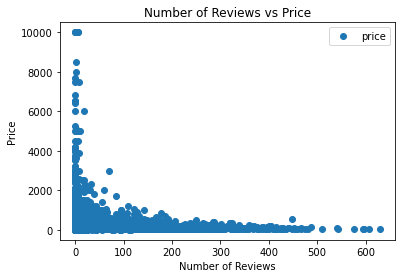

In [57]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_clean.plot(x = 'number_of_reviews', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Reviews vs Price')  
plt.xlabel('Number of Reviews')  
plt.ylabel('Price')  
plt.show()

Hypothesis: The higher the number of reviews, the lower the price of the listing. 

In [38]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_clean['number_of_reviews'].values.reshape(-1,1)
y = df_clean['price'].values.reshape(-1,1)

In [44]:
X

array([[ 9],
       [45],
       [ 0],
       ...,
       [ 0],
       [ 0],
       [ 0]])

In [40]:
y

array([[149],
       [225],
       [150],
       ...,
       [115],
       [ 55],
       [ 90]])

In [41]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [45]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [46]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

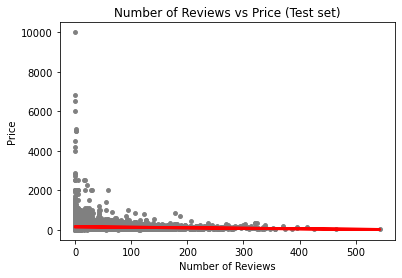

In [58]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Reviews vs Price (Test set)')
plot_test.xlabel('Number of Reviews')
plot_test.ylabel('Price')
plot_test.show()

Interpretation:   
The line does not fit the data very well at all. We can see that Airbnbs with a high number of reviews have a low price but there is a wide dispersion of prices for Airbnbs with a low number of reviews. So the number of reviews seems to play a role when it is very high but does not seem to play a role when it is low. 

### 5. Assessing Model Performance 

In [50]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [51]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.25524155]]
Mean squared error:  47844.344659923474
R2 score:  0.002666980834340027


In [60]:
y_predicted

array([[159.3423792 ],
       [127.43718503],
       [150.66416639],
       ...,
       [159.3423792 ],
       [159.3423792 ],
       [158.83189609]])

In [52]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,225,159.342379
1,40,127.437185
2,68,150.664166
3,49,157.045205
4,125,158.321413
5,49,159.087138
6,100,119.524697
7,129,159.087138
8,129,151.174649
9,70,129.223876


The negative slope indicates that there is a negative relationship, meaning as number of reviews rise the price drops. 

The mean squared error is very large at 61698, meaning that the regression line is not a good fit. The R2 value is very small at 0.0026, also indicating the model is not a good fit. 

When comparing the actual and predicted values, I can see that they are very far apart. So, the model performed very poorly overall. 

I don't think there is the possibility of data bias in this case because the prediction does not relate to people or their attributes and the training data is not based on human decisions.